<a href="https://colab.research.google.com/github/superbunny38/2021DeepLearning/blob/main/2_Chap_7_RNN%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EB%AC%B8%EC%9E%A5_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch-2.git original

Cloning into 'original'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 606 (delta 1), reused 5 (delta 0), pack-reused 598
Receiving objects: 100% (606/606), 29.82 MiB | 13.97 MiB/s, done.
Resolving deltas: 100% (361/361), done.


In [2]:
!mkdir workspace

In [3]:
!mv /content/original/common workspace

In [4]:
!mv /content/original/dataset workspace

In [7]:
!mv /content/original/ch07 workspace

In [8]:
!mv /content/original/ch06 workspace

In [9]:
%cd workspace

/content/workspace


In [10]:
import numpy as np
import matplotlib.pyplot as plt

### 문장 생성 구현

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax

In [ ]:
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

In [ ]:
class RnnlmGen(Rnnlm):#클래스 상속
  def generate(self, start_id, skip_ids = None, sample_size = 100):#문장 생성 메서드
  #start_id: 최초로 주는 단어의 ID, skip_ids: 단어 ID의 리스트로 여기에 속하는 단어 ID는 샘플링되지 않도록 한다, sample_size: 샘플링하는 단어의 수
    word_ids = [start_id]
    x = start_id
    while len(word_ids)<sample_size:
      x = np.array(x).reshape(1,1)
      score = self.predict(x)#각 단어의 점수를 출력
      p = softmax(score.flatten())#정규화하여 확률분포를 얻음

      sampled = np.random.choice(len(p), size = 1, p = p)#단어 샘플링
      if (skip_ids is None) or (sampled not in skip_ids):#샘플링되지 않아야하는 단어가 아닐 때
        x = sampled
        word_ids.append(int(x))
    return word_ids

In [ ]:
#문장 생성을 위한 코드
from dataset import ptb

초기화된 가중치

In [ ]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()

#시작 문자와 건너뜀(skip) 문자 설정
start_word = 'you'#첫 단어
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']#샘플링하지 않을 단어
skip_ids = [word_to_id[w] for w in skip_words]

#문장 생성
word_ids = model.generate(start_id, skip_ids)#단어 ID들을 배열 형태로 반환
txt = ' '.join([id_to_word[i] for i in word_ids])#ID 배열을 문장으로 변환
txt = txt.replace(' <eos>','\n')
print(txt)

you clothes underwrite trip ideological want opponent accelerated mich examine depended reasons electricity agents overhaul theme closed-end seldom heart fancy psychiatric steam hole sexual decent 190.58-point allied-signal adjustment nfl analysis tci abuses minds ask orders portugal contracting microsoft portable prefers chores ps printers dial hearing peter put park solution passion ranking prospective loser created boveri phone preserve s&ls skf style architecture cross believed horn jay connection firstsouth audit 45-year-old narcotics bearing politically seemingly moral athletic months handling venture jamaica taxes coups acted warehouses heading fibers one-time special humans snack-food arguments rake foundations two-year summary sept. equivalents economists humans useful community


학습된 가중치 활용

In [ ]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('ch06/Rnnlm.pkl')#학습된 가중치 읽기

#시작 문자와 건너뜀(skip) 문자 설정
start_word = 'you'#첫 단어
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']#샘플링하지 않을 단어
skip_ids = [word_to_id[w] for w in skip_words]

#문장 생성
word_ids = model.generate(start_id, skip_ids)#단어 ID들을 배열 형태로 반환
txt = ' '.join([id_to_word[i] for i in word_ids])#ID 배열을 문장으로 변환
txt = txt.replace(' <eos>','\n')
print(txt)

you realize the pilots also expand on how to attack the rights or the ability to pouring these business
 some officials will throw open on congressional activities
 the key to market laboratory broke get his unions exchange for nearly existing retirement since auto wednesday into the week issued a needed trading nuclear attempt to eastern europe
 manufacturers expertise that such risks as the agricultural mill as high rates they were centennial vacant investment cities mutual funds feel not overnight players
 but
 the options gained dominated as another profession at the rise mr. jones may at


더 나은 학습된 가중치 활용

In [ ]:
%cd ..

/content


In [ ]:
!mv /content/original/ch07/rnnlm_gen.py workspace

In [ ]:
%cd workspace

/content/workspace


In [ ]:
!wget https://www.oreilly.co.jp/pub/9784873118369/BetterRnnlm.pkl

--2021-12-23 00:59:40--  https://www.oreilly.co.jp/pub/9784873118369/BetterRnnlm.pkl
Resolving www.oreilly.co.jp (www.oreilly.co.jp)... 52.193.121.40, 13.231.54.159
Connecting to www.oreilly.co.jp (www.oreilly.co.jp)|52.193.121.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39550902 (38M)
Saving to: ‘BetterRnnlm.pkl’

BetterRnnlm.pkl     100%[===================>]  37.72M  6.34MB/s    in 7.2s    

2021-12-23 00:59:49 (5.25 MB/s) - ‘BetterRnnlm.pkl’ saved [39550902/39550902]



In [ ]:
import sys
sys.path.append('..')
from common.np import *
from rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('/content/workspace/BetterRnnlm.pkl')#더 나은 학습된 가중치 읽기

#시작 문자와 건너뜀(skip) 문자 설정
start_word = 'you'#첫 단어
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']#샘플링하지 않을 단어
skip_ids = [word_to_id[w] for w in skip_words]

#문장 생성
word_ids = model.generate(start_id, skip_ids)#단어 ID들을 배열 형태로 반환
txt = ' '.join([id_to_word[i] for i in word_ids])#ID 배열을 문장으로 변환
txt = txt.replace(' <eos>','\n')
print(txt)

you want to come during the reins to anybody along with mr. icahn 's new age produced by the group of robert d. morris last year
 scott and peter have the case of japanese concept mr. boesky and glasnost
 coach roger was found in executive when he had sued the insurer of advertising
 also a spokeswoman for paramount group said the herald has been working over an aborted transaction that would include the company on a or promotion business
 and if a more intimate role is what we need to make it the friendly company could


"the meaning of life is"에 이어지는 문장을 만들어 보기

In [ ]:
model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

--------------------------------------------------
the meaning of life is the price both.
 regular owner robert a. phelan and a vice president of the exchange group in los angeles county is joining federal express 's investment account at the american express hotel maker taught them about union 's efforts to send laser television all.
 asked they did n't have much choice in the same consumer and a lung-cancer price.
 one new evidence on political and welfare will come to demonstrators.
 now as call on the joint drawings of hhs secretary david bush present a proposal to be discussed at funds to auction off even more


## seq2seq(Sequence to Sequence): 시계열 데이터를 또 다른 시계열 데이터로 변환
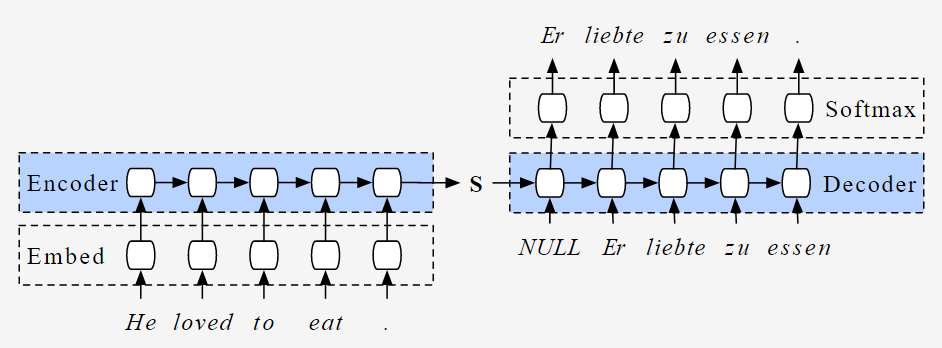

In [24]:
# coding: utf-8
import sys
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel


#### Toy problem

In [25]:
import sys
sys.path.append('..')
from dataset import sequence

In [26]:
(x_train, t_train), (x_test,t_test) =  sequence.load_data('addition.txt', seed = 1984)

In [27]:
#문자와 문자 ID의 대응관계를 담은 dictionary
char_to_id, id_to_char = sequence.get_vocab()

In [28]:
#데이터셋 형상
print(x_train.shape, t_train.shape)#훈련
print(x_test.shape, t_test.shape)#테스트

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)


In [29]:
print(x_train[0])#문자 ID
print(t_train[0])

[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]


In [30]:
print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

71+118 
_189 


In [56]:
#인코더
class Encoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):#인코더(vocab_size: 어휘수(문자의 종류), wordvec_size: 문자 벡터 차원의 수, hidden_size: LSTM계층의 은닉 벡터의 차원 수)
    V,D,H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V,D)/100).astype('f')
    lstm_Wx = (rn(D, 4*H)/np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H,4*H)/np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4*H).astype('f')

    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful = False)#상태 유지X

    self.params = self.embed.params + self.lstm.params
    self.grads = self.embed.grads + self.lstm.grads
    self.hs = None
  
  def forward(self, xs):#순전파
    xs = self.embed.forward(xs)#embedding
    hs = self.lstm.forward(xs)#lstm
    self.hs = hs
    return hs[:,-1,:]#마지막 시각의 은닉상태만을 추출
  
  def backward(self, dh):#역전파
    dhs = np.zeros_like(self.hs)#은닉상태에 대한 기울기
    dhs[:,-1,:] = dh

    dout = self.lstm.backward(dhs)
    dout = self.embed.backward(dout)
    return dout

In [57]:
class Decoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):#초기화
    V,D,H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn
    #Time Embedding - Time LSTM - Time Affine
    embed_W = (rn(V,D)/100).astype('f')
    lstm_Wx = (rn(D,4*H)/np.sqrt(D)).astype('f')
    lstm_Wh = (rn(D,4*H)/np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4*H).astype('f')
    affine_W = (rn(H,V)/np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')


    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b,stateful = True)
    self.affine = TimeAffine(affine_W, affine_b)
    self.params, self.grads = [],[]
    for layer in (self.embed, self.lstm, self.affine):
      self.params += layer.params
      self.grads += layer.grads
  
  def forward(self, xs, h):#순전파
    self.lstm.set_state(h)

    out = self.embed.forward(xs)
    out = self.lstm.forward(out)
    score = self.affine.forward(out)
    return score

  def backward(self, dscore):#역전파
    dout = self.affine.backward(dscore)
    dout = self.lstm.backward(dout)
    dout = self.embed.backward(dout)
    dh = self.lstm.dh
    return dh
  
  def generate(self, h, start_id, sample_size):#문장생성
    sampled = []
    sample_id = start_id
    self.lstm.set_state(h)

    for _ in range(sample_size):#생성하는 문자 수
      x = np.array(sample_id).reshape((1,1))
      out = self.embed.forward(x)
      out = self.lstm.forward(out)
      score = self.affine.forward(out)

      sample_id = np.argmax(score.flatten())
      sampled.append(int(sample_id))
    return sampled

In [58]:
#Encoder 클래스와 Decoder 클래스 연결
class Seq2seq(BaseModel):
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V,D,H = vocab_size, wordvec_size, hidden_size
    self.encoder = Encoder(V,D,H)
    self.decoder = Decoder(V,D,H)
    self.softmax = TimeSoftmaxWithLoss()

    self.params = self.encoder.params + self.decoder.params
    self.grads = self.encoder.grads + self.decoder.grads

  def forward(self, xs,ts):
    decoder_xs, decoder_ts = ts[:,:-1], ts[:,1:]
    h = self.encoder.forward(xs)
    score = self.decoder.forward(decoder_xs, h)
    loss = self.softmax.forward(score, decoder_ts)
    return loss
  
  def backward(self, dout=1):
    dout = self.softmax.backward(dout)
    dh = self.decoder.backward(dout)
    dout = self.encoder.backward(dh)
    return dout

  def generate(self, xs, start_id, sample_size):
    h = self.encoder.forward(xs)
    sampled = self.decoder.generate(h, start_id,sample_size)
    return sampled

#### seq2seq 평가

In [66]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq

In [67]:
#데이터셋 읽기
(x_train, t_train),(x_test, t_test) = sequence.load_data('addition.txt')

In [68]:
char_to_id, id_to_char = sequence.get_vocab()

In [69]:
id_to_char

{0: '1',
 1: '6',
 2: '+',
 3: '7',
 4: '5',
 5: ' ',
 6: '_',
 7: '9',
 8: '2',
 9: '0',
 10: '3',
 11: '8',
 12: '4'}

In [70]:
#하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [71]:
#모델 / 옵티마이저 / 트레이너 생성
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

학습

In [72]:
acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch = 1,batch_size = batch_size, max_grad = max_grad)#훈련
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]],t_test[[i]]
    verbose = i<10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  

  acc = float((correct_num)/len(x_test))
  acc_list.append(acc)
  print("검증 정확도 %.3f%%"%(acc*100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 4[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 5[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 6[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 7[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 9[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 11[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 12[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 13[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 15[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 18[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 19[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
---

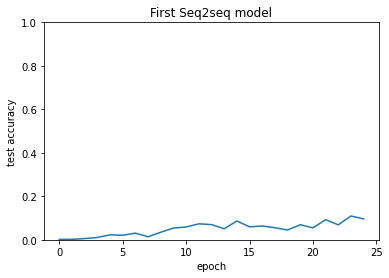

In [77]:
plt.title("First Seq2seq model")
plt.plot(acc_list)
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.ylim(0,1)
plt.show()

### Seq2seq 개선
- 입력 데이터 반전 (Reverse)
- 엿보기 (Peeky)

#### 입력 데이터 반전(Reverse)

In [78]:
x_train, x_test = x_train[:,::-1], x_test[:,::-1]#입력 데이터 반전

In [83]:
#모델 / 옵티마이저 / 트레이너 생성
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [84]:
reversed_acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch = 1,batch_size = batch_size, max_grad = max_grad)#훈련
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]],t_test[[i]]
    verbose = i<10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  

  acc = float((correct_num)/len(x_test))
  reversed_acc_list.append(acc)
  print("검증 정확도 %.3f%%"%(acc*100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 4[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 5[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 6[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 7[s] | 손실 1.82
| 에폭 1 |  반복 161 / 351 | 시간 8[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 9[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 11[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 13[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 15[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 16[s] | 손실 1.75
| 에폭 1 |  반복 321 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 18[s] | 손실 1.74
Q   58+77
T 162 
☒ 101 
---
Q 461+579
T 1139
☒ 1011
---
Q  48+285
T 666 
☒ 1011
---
Q   551+8
T 163 
☒ 101 
---
Q  55+763
T 422 
☒ 1011
---
Q 752+006
T 857 
☒ 1011
---
Q 292+167
T 1053
☒ 1011
---
Q 795+038
T 1427
☒ 1011
---


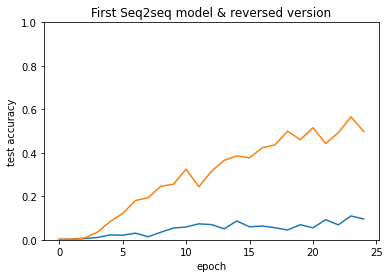

In [85]:
plt.title("First Seq2seq model & reversed version")
plt.plot(acc_list, label = "first seq2seq")
plt.plot(reversed_acc_list, label = "with reversed data")
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.ylim(0,1)
plt.show()

#### 엿보기(Peeky)

In [86]:
class PeekyDecoder:#h를 모든 시각의 Affine, LSTM 계층에 전해줌
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V,D,H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V,D)/100).astype('f')
    lstm_Wx = (rn(H+D,4*H)/np.sqrt(H+D)).astype('f')#combine
    lstm_Wh = (rn(H,4*H)/np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4*H).astype('f')
    affine_W = (rn(H+H, V)/np.sqrt(H+H)).astype('f')#바뀐 부분
    affine_b = np.zeros(V).astype('f')

    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful = True)
    self.affine = TimeAffine(affine_W, affine_b)

    self.params, self.grads = [],[]
    for layer in (self.embed, self.lstm, self.affine):
      self.params += layer.params
      self.grads += layer.grads
    
    self.cache = None
  
  def forward(self, xs, h):
    N, T = xs.shape
    N, H  = h.shape

    self.lstm.set_state(h)

    out = self.embed.forward(xs)
    hs = np.repeat(h, T, axis =0).reshape(N,T,H)#h를 시계열만큼 복제
    out = np.concatenate((hs, out), axis = 2)#H와 연결

    out = self.lstm.forward(out)
    out = np.concatenate((hs, out),axis = 2)#h와 연결

    score = self.affine.forward(out)
    self.cache = H
    return score

In [88]:
from ch07.seq2seq import Seq2seq, Encoder

In [89]:
class PeakySeq2seq(Seq2seq):
  def __init__(self, vocab_size, wordvec_sizze, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    self.encoder = Encoder(V,D,H)
    self.decoder = PeekyDecoder(V,D,H)
    self.softmax = TimeSoftmaxWithLoss()


    self.params = self.encoder.params + self.decoder.params
    self.grads = self.encoder.grads + self.decoder.grads

깃허브에서 가져옴

In [98]:

class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [99]:
model = PeakySeq2seq(vocab_size, wordvec_size, hidden_size)

In [100]:
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [101]:
peaky_acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch = 1,batch_size = batch_size, max_grad = max_grad)#훈련
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]],t_test[[i]]
    verbose = i<10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  

  acc = float((correct_num)/len(x_test))
  peaky_acc_list.append(acc)
  print("검증 정확도 %.3f%%"%(acc*100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.18
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.97
| 에폭 1 |  반복 81 / 351 | 시간 4[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 5[s] | 손실 1.81
| 에폭 1 |  반복 121 / 351 | 시간 7[s] | 손실 1.80
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.78
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 11[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 12[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 13[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 16[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 17[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 18[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 20[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 21[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48+285
T 666 
☒ 1000
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1000
---
Q 752+006
T 857 
☒ 1000
---
Q 292+167
T 1053
☒ 1000
---
Q 795+038
T 1427
☒ 1110
--

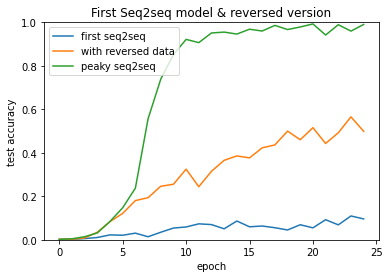

In [103]:
plt.title("First Seq2seq model & reversed version")
plt.plot(acc_list, label = "first seq2seq")
plt.plot(reversed_acc_list, label = "with reversed data")
plt.plot(peaky_acc_list, label = 'peaky seq2seq')
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()